In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data set ini berisi pertandingan sepak bola skala internasional dari tahun 1872 hingga 2022
data set ini berisi 9 kolom yang berisi:
1. date = tanggal pertandingan
2. home_team = negara yang menjadi tuan rumah
3. away_team = negara yang menjadi tamu
4. home_score = skor yang diraih oleh negara tuan rumah
5. away_score = skor yang diraih oleh negara tamu
6. tournament = jenis tournament yang diselenggarakan
7. city = nama kota dari negara tuan rumah yang dilakukan pertandingan
8. country = nama negara dari negara tuan rumah yang dilakukan pertandingan
9. neutral
   a. True = kedua tim bertanding di negara yang bukan dari negara kedua tim tersebut
   b. False = salah satu dari dari tim tersebut bertanding di negaranya sendiri

In [3]:
#membaca data set
football_data = pd.read_csv("C:\\Users\\ASUS\\OneDrive - Bina Nusantara\\Documents\\international footbal results from 1872 to 2022.csv")
#menampilkan data set
football_data

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
44348,2022-12-14,Thailand,Taiwan,0,1,Friendly,Pathum Thani,Thailand,False
44349,2022-12-14,Vietnam,Philippines,1,0,Friendly,Hanoi,Vietnam,False
44350,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup,Al Rayyan,Qatar,True
44351,2022-12-17,Singapore,Maldives,3,1,Friendly,Singapore,Singapore,False


1. kelompokkan data berdasarkan tipe tournament world cup (fifa world cup)

In [4]:
#memisahkan jenis tournament untuk FIFA World Cup
data_fifa_wc = football_data.loc[(football_data['tournament'] == 'FIFA World Cup')]
#menampilkan data set
data_fifa_wc

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
1311,1930-07-13,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True
1312,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True
1313,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True
1314,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True
1315,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True
...,...,...,...,...,...,...,...,...,...
44343,2022-12-10,England,France,1,2,FIFA World Cup,Al Khor,Qatar,True
44345,2022-12-13,Argentina,Croatia,3,0,FIFA World Cup,Lusail,Qatar,True
44346,2022-12-14,France,Morocco,2,0,FIFA World Cup,Al Khor,Qatar,True
44350,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup,Al Rayyan,Qatar,True


2. analisa dan cari tahu 3 negara yg mencetak gol terbanyak pada piala dunia 2022

In [5]:
#kelompokkan fifa world cup hanya di tahun 2022
data_fifa_wc2022 = data_fifa_wc[(data_fifa_wc['date'] > '2022-01-01')]
#menampilkan data set
data_fifa_wc2022

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
44283,2022-11-20,Qatar,Ecuador,0,2,FIFA World Cup,Al Khor,Qatar,False
44284,2022-11-21,Senegal,Netherlands,0,2,FIFA World Cup,Doha,Qatar,True
44285,2022-11-21,England,Iran,6,2,FIFA World Cup,Al Rayyan,Qatar,True
44286,2022-11-21,United States,Wales,1,1,FIFA World Cup,Al Rayyan,Qatar,True
44287,2022-11-22,Argentina,Saudi Arabia,1,2,FIFA World Cup,Lusail,Qatar,True
...,...,...,...,...,...,...,...,...,...
44343,2022-12-10,England,France,1,2,FIFA World Cup,Al Khor,Qatar,True
44345,2022-12-13,Argentina,Croatia,3,0,FIFA World Cup,Lusail,Qatar,True
44346,2022-12-14,France,Morocco,2,0,FIFA World Cup,Al Khor,Qatar,True
44350,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup,Al Rayyan,Qatar,True


In [6]:
#kelompokkan fifa world cup 2022 untuk negara tuan rumah beserta skornya
data_fifa_wc2022_home = data_fifa_wc2022[['home_team', 'home_score']]
#menampilkan data set
data_fifa_wc2022_home

,home_team,home_score
44283,Qatar,0
44284,Senegal,0
44285,England,6
44286,United States,1
44287,Argentina,1
...,...,...
44343,England,1
44345,Argentina,3
44346,France,2
44350,Croatia,2


In [7]:
#kelompokkan fifa world cup 2022 untuk negara tuan rumah beserta skornya
#lalu diurutkan sesuai index huruf 
data_fifa_wc2022_home = data_fifa_wc2022_home.groupby('home_team', as_index = False).sum()
#menampilkan data set
data_fifa_wc2022_home

,home_team,home_score
0,Argentina,11
1,Australia,1
2,Belgium,1
3,Brazil,7
4,Cameroon,4
5,Canada,1
6,Costa Rica,2
7,Croatia,7
8,Denmark,0
9,Ecuador,1


In [8]:
#mengubah negara tuan rumah menjadi 'country'
data_fifa_wc2022_home.rename(columns = {'home_team' : 'country'}, inplace = True)
#menampilkan data set
data_fifa_wc2022_home

,country,home_score
0,Argentina,11
1,Australia,1
2,Belgium,1
3,Brazil,7
4,Cameroon,4
5,Canada,1
6,Costa Rica,2
7,Croatia,7
8,Denmark,0
9,Ecuador,1


In [9]:
#kelompokkan fifa world cup 2022 untuk negara tamu beserta skornya
data_fifa_wc2022_away = data_fifa_wc2022[['away_team', 'away_score']]
#menampilkan data set
data_fifa_wc2022_away

,away_team,away_score
44283,Ecuador,2
44284,Netherlands,2
44285,Iran,2
44286,Wales,1
44287,Saudi Arabia,2
...,...,...
44343,France,2
44345,Croatia,0
44346,Morocco,0
44350,Morocco,1


In [10]:
#kelompokkan fifa world cup 2022 untuk negara tuan rumah beserta skornya
#lalu diurutkan sesuai index huruf 
data_fifa_wc2022_away = data_fifa_wc2022_away.groupby('away_team', as_index = False).sum()
#menampilkan data set
data_fifa_wc2022_away

,away_team,away_score
0,Argentina,4
1,Australia,3
2,Belgium,0
3,Brazil,1
4,Cameroon,0
5,Canada,1
6,Costa Rica,1
7,Croatia,1
8,Denmark,1
9,Ecuador,3


In [11]:
#mengubah negara tamu menjadi 'country'
data_fifa_wc2022_away.rename(columns = {'away_team' : 'country'}, inplace = True)
#menampilkan data set
data_fifa_wc2022_away

,country,away_score
0,Argentina,4
1,Australia,3
2,Belgium,0
3,Brazil,1
4,Cameroon,0
5,Canada,1
6,Costa Rica,1
7,Croatia,1
8,Denmark,1
9,Ecuador,3


In [12]:
#mempersatukan tabel negara tuan rumah dan tabel negara tamu dalam satu tabel
merge_data = pd.merge(data_fifa_wc2022_home, data_fifa_wc2022_away, how = 'outer', on = 'country')
#menampilkan data set
merge_data

,country,home_score,away_score
0,Argentina,11,4.0
1,Australia,1,3.0
2,Belgium,1,0.0
3,Brazil,7,1.0
4,Cameroon,4,0.0
5,Canada,1,1.0
6,Costa Rica,2,1.0
7,Croatia,7,1.0
8,Denmark,0,1.0
9,Ecuador,1,3.0


In [13]:
#mengisi data yang kosong dengan 0 pada negara Qatar (Qatar tidak mempunyai away_score karena ia merupakan negara tuan rumah)
merge_data['away_score'] = merge_data['away_score'].fillna(0)
#menampilkan data set
merge_data

,country,home_score,away_score
0,Argentina,11,4.0
1,Australia,1,3.0
2,Belgium,1,0.0
3,Brazil,7,1.0
4,Cameroon,4,0.0
5,Canada,1,1.0
6,Costa Rica,2,1.0
7,Croatia,7,1.0
8,Denmark,0,1.0
9,Ecuador,1,3.0


In [14]:
#mengubah tipe data away_score dari float menjadi int
merge_data['away_score'] = merge_data['away_score'].astype(int)
#menampilkan data set
merge_data

,country,home_score,away_score
0,Argentina,11,4
1,Australia,1,3
2,Belgium,1,0
3,Brazil,7,1
4,Cameroon,4,0
5,Canada,1,1
6,Costa Rica,2,1
7,Croatia,7,1
8,Denmark,0,1
9,Ecuador,1,3


In [15]:
#membuat tabel total_score
merge_data['total_score'] = merge_data['home_score'] + merge_data['away_score'] 
#menampilkan data set
merge_data

,country,home_score,away_score,total_score
0,Argentina,11,4,15
1,Australia,1,3,4
2,Belgium,1,0,1
3,Brazil,7,1,8
4,Cameroon,4,0,4
5,Canada,1,1,2
6,Costa Rica,2,1,3
7,Croatia,7,1,8
8,Denmark,0,1,1
9,Ecuador,1,3,4


In [16]:
#mengurutkan jumlah total_score secara descending
merge_data.sort_values(by = ['total_score'], ascending = False, inplace = True)
#menampilkan data set
merge_data

,country,home_score,away_score,total_score
11,France,11,5,16
0,Argentina,11,4,15
10,England,10,3,13
20,Portugal,11,1,12
18,Netherlands,6,4,10
26,Spain,8,1,9
3,Brazil,7,1,8
7,Croatia,7,1,8
17,Morocco,1,5,6
12,Germany,1,5,6


In [17]:
#menampilkan 3 negara yang mencetak gol terbanyak 
fifa_wc2022_top3 = merge_data.head(3)
#menampilkan data set
fifa_wc2022_top3

,country,home_score,away_score,total_score
11,France,11,5,16
0,Argentina,11,4,15
10,England,10,3,13


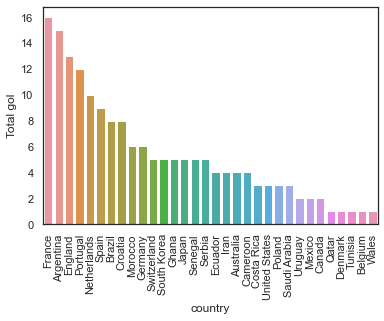

In [19]:
# Menampilkan hasil perolehan gol setiap negara
sns.set(style="white") # Mengubah style dari barchart
sns.barplot(x='country',y='total_score',data = merge_data) # Membuat barchart dengan sumbu x = negara, sumbu y = total gol
plt.ylabel('Total gol') # Melabeli sumbu y sebagai total gol
plt.xticks(rotation=90) # Memutar teks pada koordinat-koordinat di sumbu x sejauh 90 derajat
plt.show() # Menampilkan barchart

4. Memvisualisasikan perbandingan jumlah perolehan gol 'Friendly Tournament' negara Perancis dan Amerika dalam 5 tahun terakhir

In [ ]:
# Mengambil data pertandingan Friendly Tournament
data_wc = football_data.loc[(football_data['tournament'] == 'Friendly')]
data_wc

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
44344,2022-12-11,Thailand,Myanmar,6,0,Friendly,Pathum Thani,Thailand,False
44347,2022-12-14,Malaysia,Maldives,3,0,Friendly,Kuala Lumpur,Malaysia,False
44348,2022-12-14,Thailand,Taiwan,0,1,Friendly,Pathum Thani,Thailand,False
44349,2022-12-14,Vietnam,Philippines,1,0,Friendly,Hanoi,Vietnam,False


In [85]:
#kelompokkan friendly world cup dalam 5 tahun terakhir
data_wc_fren = data_wc[(data_wc['date'] > '2017-01-01')]
#menampilkan data set
data_wc_fren

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
39021,2017-01-04,Tunisia,Uganda,2,0,Friendly,Tunis,Tunisia,False
39022,2017-01-05,Cameroon,DR Congo,2,0,Friendly,Yaoundé,Cameroon,False
39024,2017-01-07,Algeria,Mauritania,3,1,Friendly,Blida,Algeria,False
39025,2017-01-07,Burkina Faso,Mali,2,1,Friendly,Marrakech,Morocco,True
39026,2017-01-08,Egypt,Tunisia,1,0,Friendly,Cairo,Egypt,False
...,...,...,...,...,...,...,...,...,...
44344,2022-12-11,Thailand,Myanmar,6,0,Friendly,Pathum Thani,Thailand,False
44347,2022-12-14,Malaysia,Maldives,3,0,Friendly,Kuala Lumpur,Malaysia,False
44348,2022-12-14,Thailand,Taiwan,0,1,Friendly,Pathum Thani,Thailand,False
44349,2022-12-14,Vietnam,Philippines,1,0,Friendly,Hanoi,Vietnam,False


In [122]:
# Ambil data yang mengandung Perancis sebagai home team
frans_home = data_wc_fren.loc[(data_wc_fren['home_team'] == 'France')]
frans_home

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
39186,2017-03-28,France,Spain,0,2,Friendly,Saint-Denis,France,False
39247,2017-06-02,France,Paraguay,5,0,Friendly,Rennes,France,False
39379,2017-06-13,France,England,3,2,Friendly,Saint-Denis,France,False
39835,2017-11-10,France,Wales,2,0,Friendly,Saint-Denis,France,False
40066,2018-03-23,France,Colombia,2,3,Friendly,Saint-Denis,France,False
40197,2018-05-28,France,Republic of Ireland,2,0,Friendly,Saint-Denis,France,False
40232,2018-06-01,France,Italy,3,1,Friendly,Nice,France,False
40340,2018-06-09,France,United States,1,1,Friendly,Lyon,France,False
40590,2018-10-11,France,Iceland,2,2,Friendly,Guingamp,France,False
40838,2018-11-20,France,Uruguay,1,0,Friendly,Paris,France,False


In [125]:
# Simpan jumlah perolehan gol Perancis ketika sebagai tuan rumah
frans_home = frans_home[['home_score','away_score']].sum()
frans_home

home_score    43
away_score    15
dtype: int64

In [123]:
# Ambil data yang mengandung Perancis sebagai away team
frans_away = data_wc_fren.loc[(data_wc_fren['away_team'] == 'France')]
frans_away

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
39889,2017-11-14,Germany,France,2,2,Friendly,Cologne,Germany,False
40158,2018-03-27,Russia,France,1,3,Friendly,Saint Petersburg,Russia,False


In [124]:
# Simpan jumlah perolehan gol Perancis sebagai away team
frans_away = frans_away[['home_score','away_score']].sum()
frans_away

home_score    3
away_score    5
dtype: int64

In [114]:
# # Ambil data yang mengandung US sebagai tuan rumah
us_home = data_wc_fren.loc[(data_wc_fren['home_team'] == 'United States')]
us_home

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
39081,2017-01-29,United States,Serbia,0,0,Friendly,San Diego,United States,False
39253,2017-06-03,United States,Venezuela,1,1,Friendly,Sandy,United States,False
39472,2017-07-01,United States,Ghana,2,1,Friendly,East Hartford,United States,False
40020,2018-01-28,United States,Bosnia and Herzegovina,0,0,Friendly,Carson,United States,False
40169,2018-03-27,United States,Paraguay,1,0,Friendly,Cary,United States,False
40192,2018-05-28,United States,Bolivia,3,0,Friendly,Chester,United States,False
40482,2018-09-07,United States,Brazil,0,2,Friendly,East Rutherford,United States,False
40567,2018-09-11,United States,Mexico,1,0,Friendly,Nashville,United States,False
40596,2018-10-11,United States,Colombia,2,4,Friendly,Tampa,United States,False
40696,2018-10-16,United States,Peru,1,1,Friendly,East Hartford,United States,False


In [115]:
# # Ambil data yang mengandung US sebagai away team
us_away = data_wc_fren.loc[(data_wc_fren['away_team'] == 'United States')]
us_away

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
39898,2017-11-14,Portugal,United States,1,1,Friendly,Leiria,Portugal,False
40248,2018-06-02,Republic of Ireland,United States,2,1,Friendly,Dublin,Republic of Ireland,False
40340,2018-06-09,France,United States,1,1,Friendly,Lyon,France,False
40738,2018-11-15,England,United States,3,0,Friendly,London,England,False
40841,2018-11-20,Italy,United States,1,0,Friendly,Genk,Belgium,True
42271,2020-11-12,Wales,United States,0,0,Friendly,Cardiff,Wales,False
42461,2021-03-28,Northern Ireland,United States,1,2,Friendly,Belfast,Northern Ireland,False
42565,2021-05-30,Switzerland,United States,2,1,Friendly,St. Gallen,Switzerland,False
44170,2022-09-27,Saudi Arabia,United States,0,0,Friendly,Murcia,Spain,True


In [116]:
# Simpan jumlah perolehan gol US sebagai tuan rumah dan sebagai away team
us_home = us_home[['home_score','away_score']].sum()
print(us_home)
us_away = us_away[['home_score','away_score']].sum()
print(us_away)

home_score    51
away_score    21
dtype: int64
home_score    11
away_score     6
dtype: int64


In [127]:
# Buat sebuah dataframe untuk menyimpan perolehan gol US
us = {'country': ['United States'], 'total_score': [us_home['home_score'] + us_home['away_score'] + us_away['home_score'] + us_away['away_score']]}
us = pd.DataFrame(us)
us

,country,total_score
0,United States,89


In [128]:
# Membuat sebuah dataframe untuk menyimpan perolehan gol Perancis
frans = {'country': ['France'], 'total_score': [frans_home['home_score'] + frans_home['away_score'] + frans_away['home_score'] + frans_away['away_score']]}
frans = pd.DataFrame(frans)
frans

,country,total_score
0,France,66


In [130]:
# Menggabungkan kedua dataframe
data = pd.concat([us,frans])
data

,country,total_score
0,United States,89
0,France,66


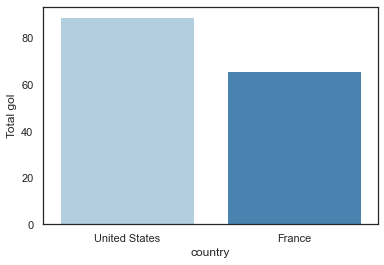

In [133]:
# Menampilkan hasil perolehan gol setiap negara
sns.barplot(x='country',y='total_score',data = data,palette = 'Blues') # Membuat barchart dengan sumbu x = negara, sumbu y = total gol
plt.ylabel('Total gol') # Melabeli sumbu y sebagai total gol
plt.show() # Menampilkan barchart